In [58]:
import pandas as pd

import numpy as np
import tensorflow as tf
import random as random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

In [59]:
df_mlp = pd.read_pickle('../../Data/output/df_process.pkl')

In [60]:
df_mlp.info

<bound method DataFrame.info of           Age  Hours per day  While working  Instrumentalist  Composer   
2   -0.600797       0.139914              0                0         0  \
3    2.998857      -0.357487              1                0         1   
4   -0.600797       0.139914              1                0         0   
5   -0.600797       0.471515              1                1         1   
6   -0.600797      -0.191686              1                1         0   
..        ...            ...            ...              ...       ...   
731 -0.684510      -0.523287              1                1         0   
732 -0.600797      -0.854887              1                1         0   
733 -0.517085       0.803115              1                0         1   
734 -0.517085       0.471515              1                1         0   
735  0.320044      -0.523287              1                0         0   

     Exploratory  Foreign languages       BPM  Frequency [Classical]   
2      

In [61]:
# columns_to_drop = ['Fav genre_Jazz', 'Fav genre_K pop', 'Fav genre_Latin', 'Fav genre_Lofi', 'Fav genre_Metal', 'Fav genre_Pop', 'Fav genre_R&B','Fav genre_Rap', 'Fav genre_Rock', 'Fav genre_Video game music', 'Fav genre_Country', 'Fav genre_EDM', 'Fav genre_Folk', 'Fav genre_Gospel', 'Fav genre_Hip hop']

# df_mlp.drop(columns_to_drop, axis=1, inplace=True)

In [62]:
df_mlp = pd.get_dummies(df_mlp, columns=['Music effects'], prefix='ME')

In [63]:
df_mlp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 2 to 735
Data columns (total 51 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Age                                                          718 non-null    float64
 1   Hours per day                                                718 non-null    float64
 2   While working                                                718 non-null    int64  
 3   Instrumentalist                                              718 non-null    int64  
 4   Composer                                                     718 non-null    int64  
 5   Exploratory                                                  718 non-null    int64  
 6   Foreign languages                                            718 non-null    int64  
 7   BPM                                                          718 non-null    float64


In [81]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [82]:
# music_effects = ['ME_0', 'ME_1', 'ME_2']

X = df_mlp.drop(['ME_0', 'ME_1', 'ME_2'], axis=1)
y = df_mlp[['ME_0', 'ME_1', 'ME_2']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [86]:
# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Increase the number of neurons
model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))  # Another dense layer
model.add(Dense(32, activation='relu'))  # And another
model.add(Dropout(0.2))  # Another dropout layer
model.add(Dense(3, activation='softmax')) 

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.15, verbose=1)

Epoch 1/30
17/17 [==============================] - 1s 16ms/step - loss: 0.8100 - accuracy: 0.6931 - val_loss: 0.5764 - val_accuracy: 0.7935
Epoch 2/30
17/17 [==============================] - 0s 4ms/step - loss: 0.7376 - accuracy: 0.6931 - val_loss: 0.5821 - val_accuracy: 0.7935
Epoch 3/30
17/17 [==============================] - 0s 4ms/step - loss: 0.6768 - accuracy: 0.7375 - val_loss: 0.5657 - val_accuracy: 0.7935
Epoch 4/30
17/17 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.7394 - val_loss: 0.5729 - val_accuracy: 0.7935
Epoch 5/30
17/17 [==============================] - 0s 4ms/step - loss: 0.6619 - accuracy: 0.7278 - val_loss: 0.5596 - val_accuracy: 0.7935
Epoch 6/30
17/17 [==============================] - 0s 8ms/step - loss: 0.6548 - accuracy: 0.7355 - val_loss: 0.5681 - val_accuracy: 0.7935
Epoch 7/30
17/17 [==============================] - 0s 5ms/step - loss: 0.6322 - accuracy: 0.7278 - val_loss: 0.5678 - val_accuracy: 0.7935
Epoch 8/30
17/17 [=

In [87]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Training Accuracy: 89.51%
Test Accuracy: 73.15%


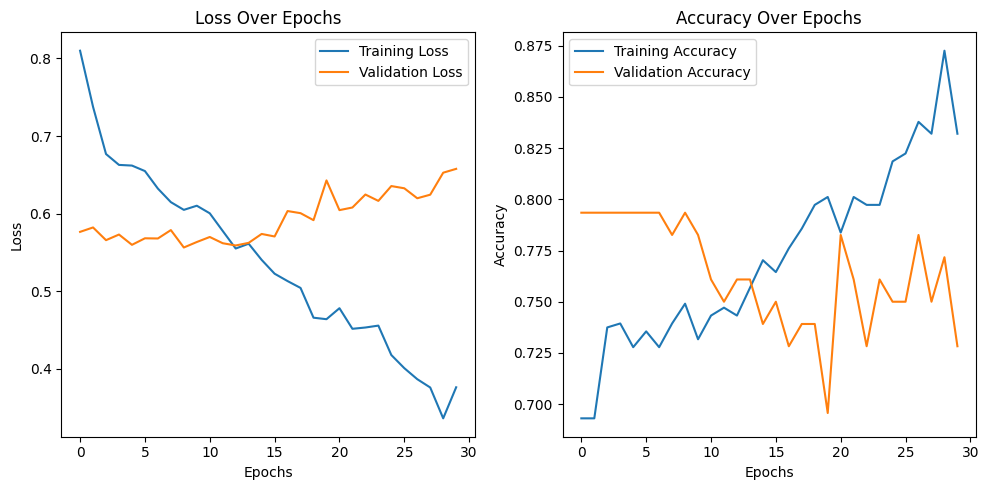

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [89]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Convert DataFrame to tensors
features = torch.tensor(df_mlp.drop(['ME_0', 'ME_1', 'ME_2'], axis=1).values).float()
targets = torch.tensor(df_mlp[['ME_0', 'ME_1', 'ME_2']].values).float()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features.numpy(), targets.numpy(), test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = map(torch.tensor, (X_train, X_test, y_train, y_test))

# Create TensorDatasets for training and validation
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Create DataLoaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
input_size = X_train.shape[1]
output_size = 3  # for 3 music genres
model = MLP(input_size, output_size)

# Define the loss function and the optimizer
criterion = nn.nn.BCEWithLogitsLoss()  # If your targets are class indices; if one-hot encoded, use nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 20
for epoch in range(n_epochs):
    model.train()  # Set model to training mode
    train_loss = 0.0
    
    for data, target in train_loader:
        optimizer.zero_grad()   # Clear the gradients
        output = model(data)    # Forward pass
        loss = criterion(output, target)  # Compute the loss
        loss.backward()         # Backward pass
        optimizer.step()        # Update weights
        
        train_loss += loss.item()*data.size(0)
    
    # Print training statistics
    train_loss = train_loss/len(train_loader.dataset)
    print(f'Epoch: {epoch+1} \tTraining Loss: {train_loss:.6f}')


Epoch: 1 	Training Loss: 0.924153
Epoch: 2 	Training Loss: 0.677111
Epoch: 3 	Training Loss: 0.646493
Epoch: 4 	Training Loss: 0.637351
Epoch: 5 	Training Loss: 0.624960
Epoch: 6 	Training Loss: 0.613113
Epoch: 7 	Training Loss: 0.609729
Epoch: 8 	Training Loss: 0.588977
Epoch: 9 	Training Loss: 0.588248
Epoch: 10 	Training Loss: 0.572249
Epoch: 11 	Training Loss: 0.552141
Epoch: 12 	Training Loss: 0.548814
Epoch: 13 	Training Loss: 0.534138
Epoch: 14 	Training Loss: 0.524321
Epoch: 15 	Training Loss: 0.503302
Epoch: 16 	Training Loss: 0.486688
Epoch: 17 	Training Loss: 0.471289
Epoch: 18 	Training Loss: 0.454640
Epoch: 19 	Training Loss: 0.445018
Epoch: 20 	Training Loss: 0.410111
